# 영화 추천 시스템

1. Demographic Filtering (인구통계학적 필터링)
2. Content Based Filtering (컨텐츠 기반 필터링)
3. Collaborative Filtering (협업 필터링)

### 1. Demographic Filtering (인구통계학적 필터링)

In [4]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
df2.head(3) # head 괄호 안에 숫자를 넣으면 그 개수만큼 보여줌

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
df1.shape, df2.shape

((4803, 4), (4803, 20))

In [8]:
df1['title'].equals(df2['title'])

True

In [9]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [10]:
df1.columns = ['id', 'title', 'cast', 'crew'] # movie_id를 id로 이름 변경
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [11]:
df1[['id', 'cast', 'crew']] # title이 없는 행렬

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [12]:
df2 = df2.merge(df1[['id', 'cast', 'crew']], on='id') # merge는 두 개의 행렬을 합치게 해준다
                                                      # on 속성으로 id를 기준으로 합치게 된다

In [13]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


영화 1 : 영화의 평점이 10/10 -> 5명이 평가

영화 2 : 영화의 평점이 8/10 -> 500명이 평가

In [15]:
C = df2['vote_average'].mean()
C # 모든 영화의 평점의 평균

6.092171559442016

In [16]:
m = df2['vote_count'].quantile(0.9) # 상위 10%에 해당하는 vote_count 수치
m # 상위 10%는 1838개 이상의 평가가 있는 것이다

1838.4000000000015

In [17]:
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape # 약 1/10개의 데이터만 남은 것

(481, 22)

In [18]:
q_movies['vote_count'].sort_values() # vote_count값을 기준으로 오름차순으로 정렬, 출력값의 왼쪽의 숫자는 원래의 index 번호

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [19]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [20]:
q_movies['score'] = q_movies.apply(weighted_rating, axis = 1)
# apply를 이용하여 weighted_rating 함수를 거치고 나온 값을 'score' 라는 속성을 추가하여 함수의 값이 들어감
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [21]:
q_movies = q_movies.sort_values('score', ascending=False) # score값을 기준으로 내림차순으로 정렬
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10) # 대괄호 2개를 열고 안에 속성을 넣으면 그 속성들만 볼 수 있음

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

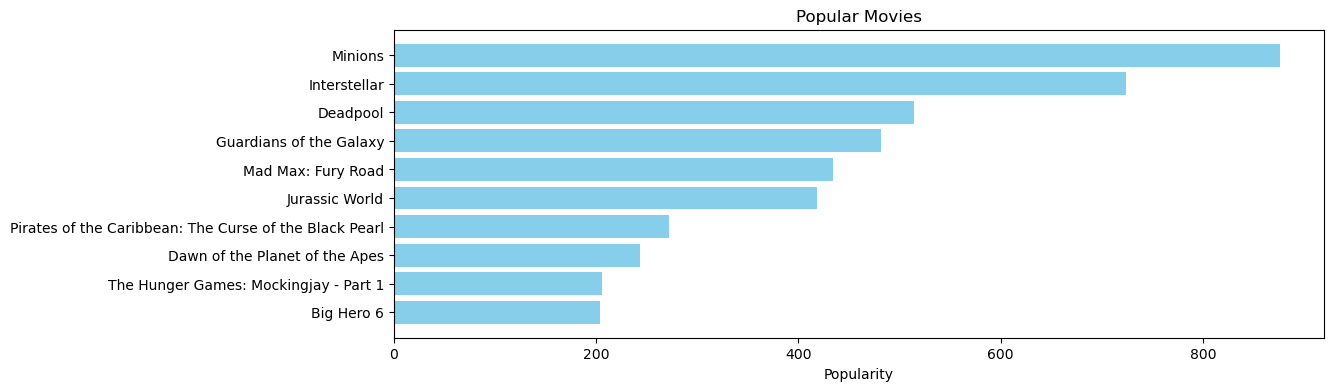

In [22]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
# popularity와 코드에서 만든 score와 내림차순 10번쨰 결과가 다른 이유는 popularity 점수 산정 방법이 score와 많이 다르기 때문

### 2. Content Based Filtering (컨텐츠 기반 필터링)

In [24]:
df2['overview'].head(5) # 줄거리에 대한 내용

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Bag Of Words - BOW

I am a boy

I am a girl

I(2), am(2), a(2), boy(1), girl(1)


         I    am    a    boy    girl
 문장1   1     1    1     1       0    (1, 1, 1, 1, 0)
 (I am a boy)

 문장2   1     1    1     0       1    (1, 1, 1, 0, 1)
 (I am a girl)

피쳐 벡터화

문서 100개
모든 문서에서 나온 단어 10,000 개
100 * 10,000 = 100만

        단어1  단어2  단어3  단어4  ...  단어10,000
문서1     1      1      3     0     ...
문서2
문서3
...
문서100

1. TfidVectorizer (TF-IDF 기반의 벡터화)
2. CountVectorizer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # 의미가 중요하지 않은 단어들은 무시

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#ENGLISH_STOP_WORDS # 영어에서 크게 의미가 중요하지 않은 단어들

In [29]:
df2['overview'].isnull().values.any() # overview의 값에 null값이 있는지 확인

True

In [30]:
df2['overview'] = df2['overview'].fillna('')

In [31]:
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape # 4803개의 문서가 있고, 그 모든 문서들은 20978개의 단어로 이루어져 있다는 뜻

(4803, 20978)

In [32]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

| | 문장1 | 문장2 | 문장3 |
| --- | --- | --- | --- |
|문장1|1|0.3|0.8|
|문장2|0.3|1|0.5|
|문장1|0.8|0.5|1|

같은 문장끼리의 유사도는 1이므로 행렬이 대칭이 되고  
같은 문장을 제외한 문장들 중 유사도가 가장 높은 것을 찾으면 되는 것이다

In [35]:
cosine_sim.shape

(4803, 4803)

In [36]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [37]:
indices['Avatar'] # 영화 제목을 넣으면 인덱스 값이 나오는 것을 만듬

0

In [38]:
df2.iloc[[0]] # 위의 코드로 영화의 인덱스 값을 구한후, 그 값을 이 코드에 넣으면 영화의 정보가 나온다

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [39]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반환
def get_recommendations(title, cosine_sim=cosine_sim):
    # 영화 제목을 통해서 전체 데이터 기준 그 영화의 index 값을 얻기
    idx = indices[title]

    # 코사인 유사도 매트릭스 (cosine_sim)에서 idx 에 해당하는 데이터를 (idx, 유사도) 형태로 얻기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 코사인 유사도 기준으로 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱
    sim_scores = sim_scores[1:11]

    # 추천 영화 목록 10개의 인덱스 정보 추출
    movie_indices = [i[0] for i in sim_scores]

    # index 정보를 통해 영화 제목 추출
    return df2['title'].iloc[movie_indices]



In [40]:
test_idx = indices['The Dark Knight Rises'] # 영화 제목을 통해서 전체 데이터 기준 그 영화의 index 값을 얻기
test_idx

3

In [41]:
cosine_sim[3] # The Dark Knight Rises영화와 다른 영화와의 유사도 계산한 것

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

In [42]:
test_sim_scores = list(enumerate(cosine_sim[3])) # 코사인 유사도 매트릭스 (cosine_sim)에서 idx 에 해당하는 데이터를 (idx, 유사도) 형태로 얻기

In [43]:
test_sim_scores = sorted(test_sim_scores, key=lambda x: x[1], reverse=True) # 코사인 유사도 기준으로 내림차순 정렬
test_sim_scores = test_sim_scores[1:11] # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱

In [44]:
def get_second(x):
    return x[1]

lst = ['인덱스', '유사도']
print(get_second(lst))

유사도


In [45]:
(lambda x: x[1])(lst) # 작은 함수라고 생각하면 됨

'유사도'

In [46]:
# 추천 영화 목록 10개의 인덱스 정보 추출
test_movie_indices = [i[0] for i in test_sim_scores]
test_movie_indices

[65, 299, 428, 1359, 3854, 119, 2507, 9, 1181, 210]

In [47]:
# index 정보를 통해 영화 제목 추출
df2['title'].iloc[test_movie_indices]

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [48]:
df2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [49]:
get_recommendations('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object

In [50]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object